# New ML Run 2/27/23

In [1]:
import numpy as np
import pandas as pd
import util
import matplotlib.pyplot as plt

from sqlalchemy import create_engine, Column, Table, MetaData, insert
from sqlalchemy.types import BIGINT, FLOAT, REAL, VARCHAR, BOOLEAN

data_dir = "/global/cscratch1/sd/eramey16/data/dr9_training/unlensed_02_23/"
seed = 42

conn_string = 'postgresql+psycopg2://lensed_db_admin@nerscdb03.nersc.gov/lensed_db'

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


##### Downloaded galaxies from 6 degrees around RA 160 DEC 2
[DESI Legacy Survey](https://datalab.noirlab.edu/query.php?name=ls_dr9.photo_z)
query:
```
SELECT trac.ls_id, trac.ra, trac.dec, trac.type, trac.dered_mag_g, trac.dered_mag_r, trac.dered_mag_z, trac.dered_mag_w1, trac.dered_mag_w2,
trac.dered_flux_g, trac.dered_flux_r, trac.dered_flux_z, trac.dered_flux_w1, trac.dered_flux_w2,
trac.snr_g, trac.snr_r, trac.snr_z, trac.snr_w1, trac.snr_w2,
trac.flux_ivar_g, trac.flux_ivar_r, trac.flux_ivar_z, trac.flux_ivar_w1, trac.flux_ivar_w2,
trac.dchisq_1, trac.dchisq_2, trac.dchisq_3, trac.dchisq_4, trac.dchisq_5,
trac.rchisq_g, trac.rchisq_r, trac.rchisq_z, trac.rchisq_w1, trac.rchisq_w2,
trac.sersic, trac.sersic_ivar,
trac.psfsize_g, trac.psfsize_r, trac.psfsize_z,
trac.shape_r, trac.shape_e1, trac.shape_e2,
trac.shape_r_ivar, trac.shape_e1_ivar, trac.shape_e2_ivar,
phot_z.z_phot_median, phot_z.z_phot_std, phot_z.z_spec
FROM ls_dr9.tractor AS trac
INNER JOIN ls_dr9.photo_z AS phot_z ON trac.ls_id = phot_z.ls_id
WHERE (q3c_radial_query(ra,dec, 160, 2, 6))
AND NOT trac.type='PSF'
AND NOT trac.type='DUP'
ORDER BY trac.random_id
```

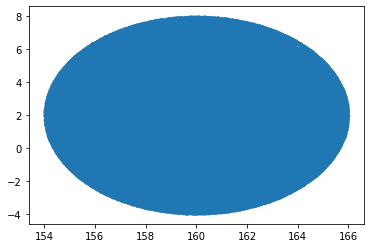

In [2]:
all_galaxies = pd.read_csv(data_dir+"dr9_160_2_6deg.dat.txt")
plt.plot(all_galaxies.ra, all_galaxies.dec, '.', ms=1)

In [3]:
db_cols = all_galaxies.columns
clean_galaxies = util.clean_and_calc(all_galaxies, mode='dr9')
clean_galaxies = clean_galaxies.sample(n=10000, random_state=seed).reset_index(drop=True)
clean_galaxies = clean_galaxies[db_cols]

/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
engine = create_engine(conn_string)
conn = engine.connect()

util.bookkeeping_setup(conn, 'cosmos_160', clean_galaxies, tag='run2')

In [15]:
conn.execute("SELECT * from bookkeeping").first()

(1, 1, 'cosmos_160', 9906620138523199, datetime.datetime(2023, 3, 4, 0, 13, 16, 599006), 1, 'run2')

In [17]:
conn.execute("SELECT * from cosmos_160").first()

(9906620138523199, 161.359081536234, -3.61537897705767, 'REX', 24.5272, 23.950127, 26.303099, nan, nan, 0.154568, 0.262996, 0.030113, -2.415954, -1.585608, 5.126769, 5.626246, 0.26396, -4.243859, -1.267464, 1459.7465, 553.70496, 85.47421, 3.136003, 0.645353, 53.576904, 55.63601, 55.546356, 55.80115, 0.0, 1.023466, 0.821119, 0.966824, 0.630448, 0.882539, 1.0, 0.0, 1.396666, 1.173516, 1.312278, 0.361837, 0.0, 0.0, 80.73173, 0.0, 0.0, 0.776393, 0.586986, -99.0, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1)

In [18]:
conn.close()